# Análise de densidade espectral para as diferentes codificações

In [10]:
# import commpy
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

import import_ipynb
from t1_encoding import *
from t2_encoding import *

In [17]:
def test(encoding_function, frame_size, M, baudrate):
    array_size = frame_size // 8
    data = np.random.randint((2**8) - 1, size=array_size, dtype=np.uint8)

    Rb = bitrate(baudrate, M)

    bit_period = 1 / Rb
    sampling_period = bit_period / 10
    sampling_frequency = 1 / sampling_period

    encoded_data = encoding_function(data, bit_period, sampling_period)
    encoded_data = np.array(encoded_data, dtype=np.int8)

    f, Pxx_den = welch(encoded_data, sampling_frequency)
    return {'Rb': Rb,
            'Rs': baudrate,
            'Encoding': str(encoding_function.__name__),
            'M': M,
            'Frame Size': frame_size,
            'psd': np.array(Pxx_den),
            'f': np.array(f),
            'output': encoded_data}


In [35]:
if __name__ == '__main__' and callable(globals().get("get_ipython", None)):

    frame_size = 16384
    baudrates = [1000, 2000, 4000, 8000]
    
    encoding_functions = [
        (encode_unipolar_rz, 2),
        (encode_unipolar_nrz, 2),
        (encode_bipolar_rz, 2),
        (encode_bipolar_nrz, 2),
        (encode_polar4_nrz, 4),
        (encode_nrzm, 2),
        (encode_nrzs, 2),
        (encode_manchester, 2),
    ]
    
    test_results = []

    for baudrate in baudrates:
        for (encoding_function, M) in encoding_functions:
            test_results += [test(encoding_function, frame_size, M, baudrate)]
            

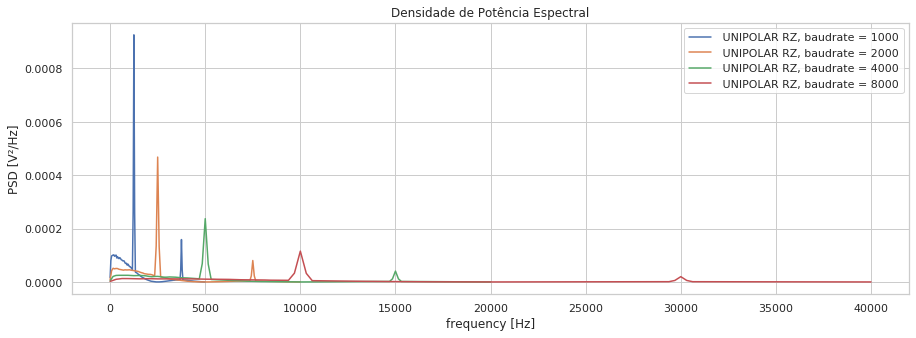

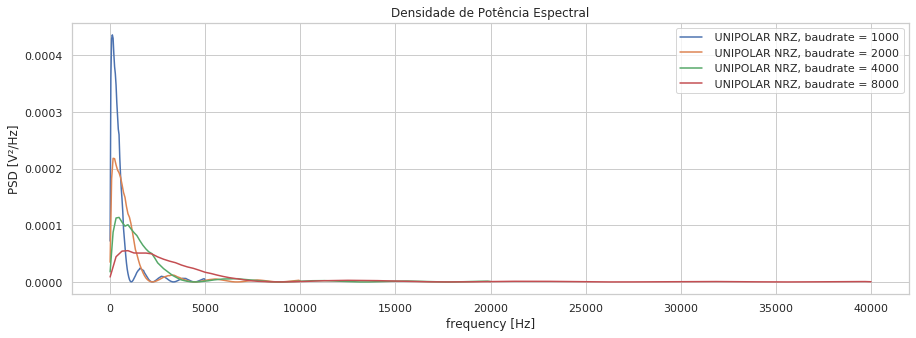

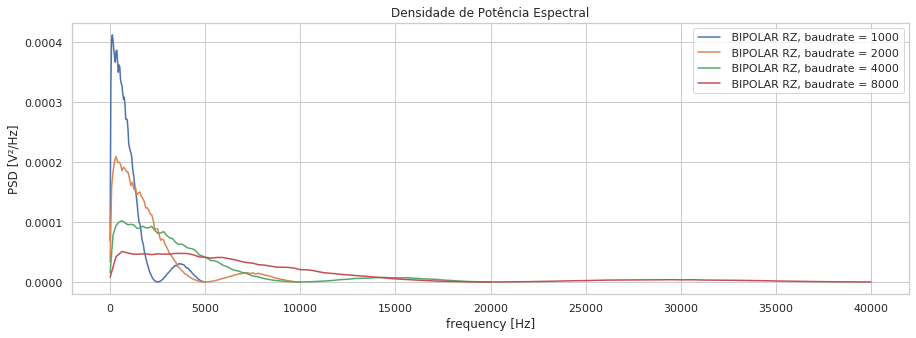

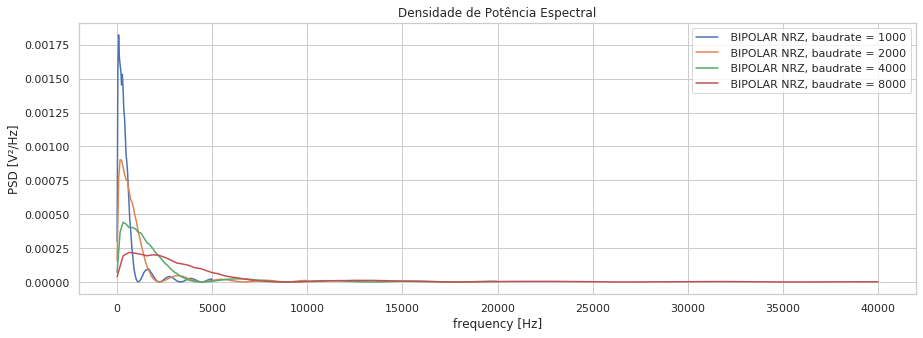

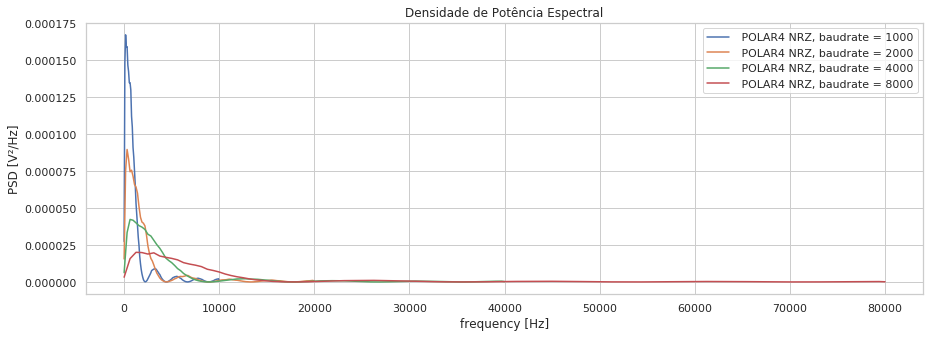

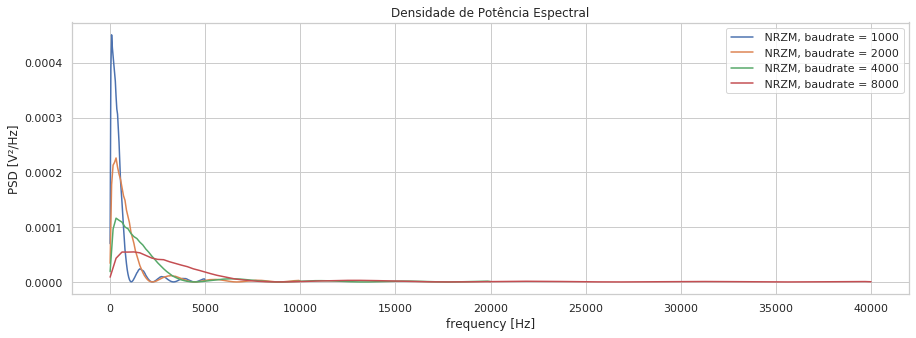

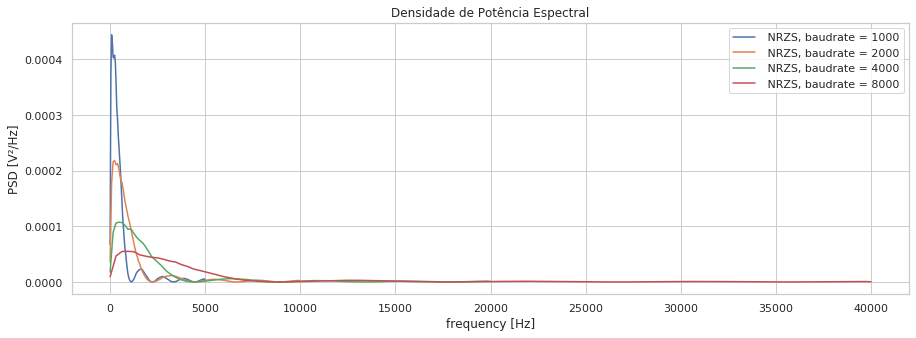

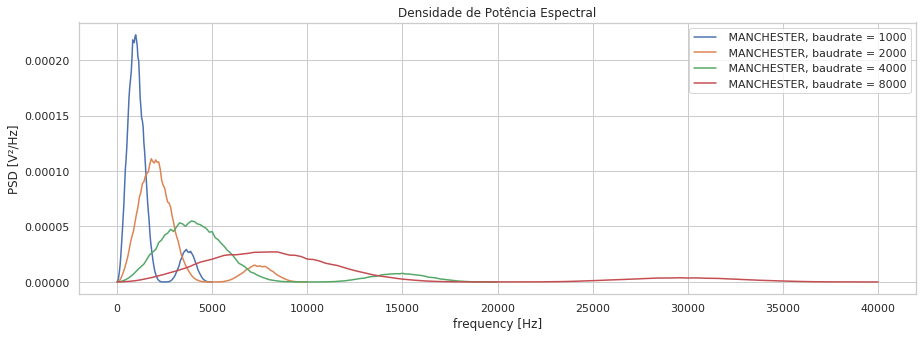

In [36]:
if __name__ == '__main__' and callable(globals().get("get_ipython", None)):

    df = pd.DataFrame(test_results)

    for (encoding, _) in encoding_functions:
        plt.figure(figsize=(15,5))
        plt.title('Densidade de Potência Espectral')
        ax = plt.gca()

        encoding = str(encoding.__name__)

        for baudrate in baudrates:
            label = encoding.replace('encode', '').replace('_', ' ').upper()
            label += ', baudrate = ' + str(baudrate)
            data = df.loc[df['Encoding'] == encoding].loc[df['Rs'] == baudrate].squeeze()
#             plt.plot(data['f'], data['psd'])
            ax = sns.lineplot(data=data,
                              y='psd',
                              x='f',
                              label=label,
                              ax=ax)

        plt.xlabel('frequency [Hz]')
        plt.ylabel('PSD [V²/Hz]')
        plt.legend()
        plt.show()

No handles with labels found to put in legend.


       Rb    Rs            Encoding  M  Frame Size  \
0  1000.0  1000  encode_unipolar_rz  2       16384   
8  2000.0  2000  encode_unipolar_rz  2       16384   

                                                 psd  \
0  [1.658955e-05, 8.167944e-05, 0.000100372796, 0...   
8  [7.438849e-06, 3.842232e-05, 4.887655e-05, 5.0...   

                                                   f  \
0  [0.0, 39.0625, 78.125, 117.1875, 156.25, 195.3...   
8  [0.0, 78.125, 156.25, 234.375, 312.5, 390.625,...   

                                              output  
0  [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...  
8  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
       Rb    Rs             Encoding  M  Frame Size  \
1  1000.0  1000  encode_unipolar_nrz  2       16384   
9  2000.0  2000  encode_unipolar_nrz  2       16384   

                                                 psd  \
1  [6.670078e-05, 0.0003469945, 0.00044617892, 0....   
9  [3.7418227e-05, 0.00018732638, 0.00022298476, ...   


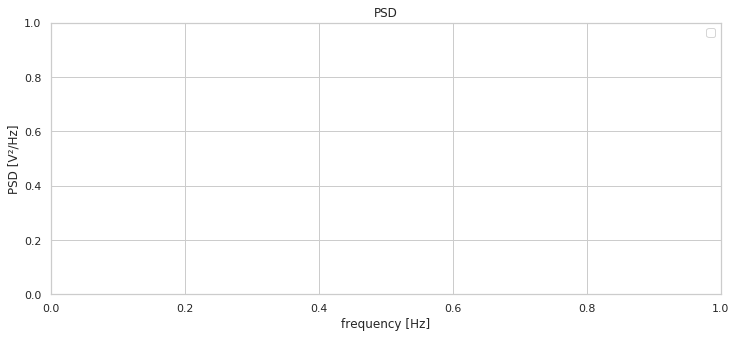

In [9]:
plt.figure(figsize=(12, 5))
plt.title('PSD')
# ax = plt.gca()
for (encoding, _) in encoding_functions:
    encoding = str(encoding.__name__)
    label = encoding.replace('encode', '').replace('_', ' ').upper()
    label += ', baudrate = ' + str(baudrate)
# ax = sns.lineplot(data=df[df['Encoding'] == encoding],
#                   y='psd',
#                   x='f',
#                   label=label,
#                   ax=ax)
    df_ = df[df['Encoding'] == encoding]
    print(df_)
#     plt.plot(df_.iloc[0]['f'], df_.iloc[0]['psd'], label=label)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V²/Hz]')
plt.legend()